<a href="https://colab.research.google.com/github/kristabdi/data-gempa/blob/master/examine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# read EQ Repository   Requested Data.csv with pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import io
import requests
warnings.filterwarnings('ignore')
from google.colab import files
 
uploaded = files.upload()

Saving EQ Repository   Requested Data.csv to EQ Repository   Requested Data (1).csv


In [ ]:
# read csv file
df = pd.read_csv(io.BytesIO(uploaded['EQ Repository   Requested Data.csv']))

# check data
print(df.describe())
print(df.columns)
print(df.shape)
print(df.dtypes)
df.head(5)

               No    Latitude   Longitude   Magnitude  Depth (km)  \
count  918.000000  918.000000  918.000000  918.000000  918.000000   
mean   459.500000   -2.480086  122.292619    3.357272   39.218954   
std    265.148072    4.014942   11.699472    0.730473   50.140577   
min      1.000000  -10.973562   95.259109    1.346044    5.000000   
25%    230.250000   -5.695009  117.923819    2.824115   10.000000   
50%    459.500000   -2.379391  122.799133    3.302828   14.000000   
75%    688.750000    0.328955  128.087753    3.773090   44.000000   
max    918.000000    5.939191  140.992050    6.473180  277.000000   

       Phase Count  Azimuth Gap  
count   918.000000   918.000000  
mean     31.471678   143.265317  
std      34.434278    66.511700  
min       4.000000    18.358719  
25%      14.000000    87.168492  
50%      23.000000   133.009691  
75%      37.000000   192.959429  
max     465.000000   326.601578  
Index(['No', 'Event ID', 'Date time', 'Latitude', 'Longitude', 'Magnitud

,No,Event ID,Date time,Latitude,Longitude,Magnitude,Mag Type,Depth (km),Phase Count,Azimuth Gap,Location,Agency
0,1,bmg2023ejlg,2023-03-04T02:03:26.722761Z,1.787241,99.129433,2.895062,MLv,10,13,60.957397,"Northern Sumatra, Indonesia",BMKG
1,2,bmg2023ejjl,2023-03-04T01:07:55.240395Z,-3.179911,121.464562,2.770212,MLv,34,13,103.988998,"Sulawesi, Indonesia",BMKG
2,3,bmg2023eiys,2023-03-03T19:42:43.793574Z,-8.607011,108.538269,2.833018,MLv,10,10,274.921814,"Java, Indonesia",BMKG
3,4,bmg2023eixe,2023-03-03T18:56:20.965755Z,0.895176,121.351234,2.629482,M,10,11,195.630051,"Minahassa Peninsula, Sulawesi",BMKG
4,5,bmg2023eiss,2023-03-03T16:41:03.094344Z,-8.308717,111.456787,2.283348,M,111,12,190.968842,"Java, Indonesia",BMKG


In [ ]:
# distinct valiue in mag type
print(df['Mag Type'].unique())

# check for duplicate value
print(df.duplicated().sum())

# distinct value in agency
print(df['Agency'].unique())



['MLv' 'M' 'Mw(mB)' 'mb']
0
['BMKG']


In [ ]:
# sort by location
df = df.sort_values(by=['Location'], ascending=True)
df

,No,Event ID,Date time,Latitude,Longitude,Magnitude,Mag Type,Depth (km),Phase Count,Azimuth Gap,Location,Agency
443,444,bmg2023djsh,2023-02-18T00:03:49.831366Z,-8.195348,115.872169,4.716299,M,17,94,62.239324,"Bali Region, Indonesia",BMKG
775,776,bmg2023csaj,2023-02-08T07:42:01.576269Z,-8.149955,114.770653,3.792449,M,10,42,119.246903,"Bali Region, Indonesia",BMKG
774,775,bmg2023cscz,2023-02-08T09:02:05.75637Z,-8.185292,114.762619,2.362921,M,15,9,171.478661,"Bali Region, Indonesia",BMKG
501,502,bmg2023dfpc,2023-02-15T17:54:18.010397Z,-8.155350,115.104767,3.023019,M,226,48,103.600304,"Bali Region, Indonesia",BMKG
855,856,bmg2023cmdx,2023-02-05T02:40:05.26019Z,-8.241666,115.586525,3.605169,M,10,30,153.890282,"Bali Region, Indonesia",BMKG
...,...,...,...,...,...,...,...,...,...,...,...,...
174,175,bmg2023eaue,2023-02-27T08:19:37.407802Z,-3.332057,140.623978,3.566019,MLv,60,13,122.708109,"West Papua, Indonesia",BMKG
117,118,bmg2023edfu,2023-02-28T16:28:05.490806Z,-3.179910,136.414093,3.634292,MLv,5,7,190.201538,"West Papua, Indonesia",BMKG
621,622,bmg2023cxoa,2023-02-11T08:16:44.048834Z,-3.712801,136.691742,3.895632,M,127,27,69.464813,"West Papua, Indonesia",BMKG
335,336,bmg2023dqpb,2023-02-21T18:23:18.892311Z,-3.152611,140.136581,2.845080,M,66,11,108.581635,"West Papua, Indonesia",BMKG


In [ ]:
# filter by magnitude > 5 then sort
df = df[df['Magnitude'] > 5]
df = df.sort_values(by=['Magnitude'], ascending=False)
df

,No,Event ID,Date time,Latitude,Longitude,Magnitude,Mag Type,Depth (km),Phase Count,Azimuth Gap,Location,Agency
280,281,bmg2023duji,2023-02-23T20:02:50.714294Z,3.297993,128.035461,6.473180,Mw(mB),105,465,24.833550,"North of Halmahera, Indonesia",BMKG
458,459,bmg2023dips,2023-02-17T09:37:35.353868Z,-6.535520,132.067154,6.363707,Mw(mB),59,284,28.335037,"Tanimbar Islands Region, Indonesia",BMKG
620,621,bmg2023cxph,2023-02-11T08:55:07.870188Z,3.702699,126.723717,6.046003,Mw(mB),56,320,63.782368,"Talaud Islands, Indonesia",BMKG
316,317,bmg2023drtc,2023-02-22T09:34:04.360751Z,-7.191280,129.563690,5.695088,Mw(mB),124,240,18.358719,Banda Sea,BMKG
734,735,bmg2023cttk,2023-02-09T06:27:59.367341Z,-2.487556,140.690430,5.491329,Mw(mB),10,218,36.573109,Near North Coast of West Papua,BMKG
205,206,bmg2023eagn,2023-02-27T01:26:04.344908Z,-1.575029,120.240334,5.402930,Mw(mB),16,192,21.487305,"Sulawesi, Indonesia",BMKG
65,66,bmg2023efoj,2023-03-01T23:05:23.271654Z,-1.655766,100.734566,5.322854,Mw(mB),83,204,50.646835,"Southern Sumatra, Indonesia",BMKG
371,372,bmg2023dnmg,2023-02-20T01:33:29.682672Z,1.903077,96.582268,5.201504,M,18,173,142.470749,Off West Coast of Northern Sumatra,BMKG
901,902,bmg2023cifu,2023-02-02T23:05:04.767764Z,2.741903,128.314865,5.151343,Mw(mB),42,167,46.033310,"Halmahera, Indonesia",BMKG
810,811,bmg2023cpqu,2023-02-07T00:35:52.395379Z,-7.381083,105.879036,5.117318,Mw(mB),48,333,57.575745,"Java, Indonesia",BMKG


In [ ]:
# sort by latitude and longitude
df = df.sort_values(by=['Latitude', 'Longitude'], ascending=True)
df

,No,Event ID,Date time,Latitude,Longitude,Magnitude,Mag Type,Depth (km),Phase Count,Azimuth Gap,Location,Agency
553,554,bmg2023dats,2023-02-13T02:33:25.644542Z,-7.531544,128.867645,5.105981,M,151,117,31.921539,Banda Sea,BMKG
240,241,bmg2023dxig,2023-02-25T10:54:10.327609Z,-7.429453,129.033646,5.015943,MLv,76,41,81.064285,Banda Sea,BMKG
810,811,bmg2023cpqu,2023-02-07T00:35:52.395379Z,-7.381083,105.879036,5.117318,Mw(mB),48,333,57.575745,"Java, Indonesia",BMKG
316,317,bmg2023drtc,2023-02-22T09:34:04.360751Z,-7.191280,129.563690,5.695088,Mw(mB),124,240,18.358719,Banda Sea,BMKG
458,459,bmg2023dips,2023-02-17T09:37:35.353868Z,-6.535520,132.067154,6.363707,Mw(mB),59,284,28.335037,"Tanimbar Islands Region, Indonesia",BMKG
339,340,bmg2023dqkw,2023-02-21T16:15:56.26735Z,-6.175488,130.096054,5.032183,M,27,58,88.484680,Banda Sea,BMKG
31,32,bmg2023ehmx,2023-03-03T00:36:48.47574Z,-3.799638,101.811073,5.006627,Mw(mB),49,199,97.485947,"Southern Sumatra, Indonesia",BMKG
734,735,bmg2023cttk,2023-02-09T06:27:59.367341Z,-2.487556,140.690430,5.491329,Mw(mB),10,218,36.573109,Near North Coast of West Papua,BMKG
65,66,bmg2023efoj,2023-03-01T23:05:23.271654Z,-1.655766,100.734566,5.322854,Mw(mB),83,204,50.646835,"Southern Sumatra, Indonesia",BMKG
205,206,bmg2023eagn,2023-02-27T01:26:04.344908Z,-1.575029,120.240334,5.402930,Mw(mB),16,192,21.487305,"Sulawesi, Indonesia",BMKG


In [ ]:
# convert to date datetime
df = pd.read_csv('EQ Repository   Requested Data.csv', encoding='utf-8')

# Convert Date time column to a Pandas datetime object
df['Date time'] = pd.to_datetime(df['Date time'])

df['Date'] = pd.to_datetime(df['Date time'])

# extract date from Date
df['Date only'] = df['Date'].dt.date

# extract hour from Date
df['Hour'] = df['Date'].dt.hour

# sory by date then hour then lat long
df = df.sort_values(by=['Date only', 'Hour', 'Latitude', 'Longitude'], ascending=True)
df.head(50)
    


,No,Event ID,Date time,Latitude,Longitude,Magnitude,Mag Type,Depth (km),Phase Count,Azimuth Gap,Location,Agency,Date,Date only,Hour
917,918,bmg2023cgmg,2023-02-02 00:05:01.667783+00:00,-0.457566,133.957459,3.841506,M,10,21,207.247238,"West Papua Region, Indonesia",BMKG,2023-02-02 00:05:01.667783+00:00,2023-02-02,0
916,917,bmg2023cgpl,2023-02-02 01:41:36.043924+00:00,5.221089,126.713188,4.480095,M,10,37,183.995575,"Mindanao, Philippines",BMKG,2023-02-02 01:41:36.043924+00:00,2023-02-02,1
914,915,bmg2023cgtl,2023-02-02 03:42:26.198770+00:00,-5.977498,130.644760,4.549271,M,137,53,64.205574,Banda Sea,BMKG,2023-02-02 03:42:26.198770+00:00,2023-02-02,3
915,916,bmg2023cgsq,2023-02-02 03:18:09.431253+00:00,-3.712688,118.958954,2.570388,M,22,26,199.612793,"Sulawesi, Indonesia",BMKG,2023-02-02 03:18:09.431253+00:00,2023-02-02,3
912,913,bmg2023chex,2023-02-02 09:30:25.664629+00:00,-0.347594,123.881271,4.781143,M,51,130,52.353928,"Minahassa Peninsula, Sulawesi",BMKG,2023-02-02 09:30:25.664629+00:00,2023-02-02,9
913,914,bmg2023chen,2023-02-02 09:18:18.057715+00:00,3.224157,97.328033,2.387329,M,19,18,104.705917,"Northern Sumatra, Indonesia",BMKG,2023-02-02 09:18:18.057715+00:00,2023-02-02,9
911,912,bmg2023chfo,2023-02-02 09:50:14.298619+00:00,4.395932,96.564163,3.053562,M,10,37,72.997253,"Northern Sumatra, Indonesia",BMKG,2023-02-02 09:50:14.298619+00:00,2023-02-02,9
910,911,bmg2023chfx,2023-02-02 10:00:02.220289+00:00,-2.637410,121.776413,3.420134,M,10,61,53.989006,"Sulawesi, Indonesia",BMKG,2023-02-02 10:00:02.220289+00:00,2023-02-02,10
909,910,bmg2023chiv,2023-02-02 11:28:36.097855+00:00,-8.436614,108.549362,3.920359,M,26,86,207.785019,"Java, Indonesia",BMKG,2023-02-02 11:28:36.097855+00:00,2023-02-02,11
907,908,bmg2023chlj,2023-02-02 12:45:55.324713+00:00,-7.247442,106.133377,4.410471,M,23,104,208.822289,"Java, Indonesia",BMKG,2023-02-02 12:45:55.324713+00:00,2023-02-02,12


In [ ]:
# find to adjacent earthquake with near lat and long
df = pd.read_csv('EQ Repository   Requested Data.csv', encoding='utf-8')
df['Date'] = pd.to_datetime(df['Date time'])
df['Date only'] = df['Date'].dt.date
df['Hour'] = df['Date'].dt.hour
df = df.sort_values(by=['Date only', 'Hour', 'Latitude', 'Longitude'], ascending=True)


No                AxesSubplot(0.125,0.657941;0.227941x0.222059)
Latitude       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Longitude      AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Magnitude         AxesSubplot(0.125,0.391471;0.227941x0.222059)
Depth (km)     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Phase Count    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Azimuth Gap          AxesSubplot(0.125,0.125;0.227941x0.222059)
Hour              AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

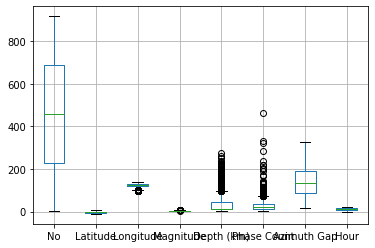

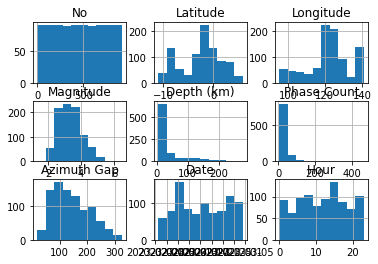

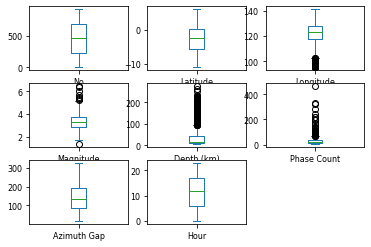

In [ ]:
# check for data quality 
# check for missing values
df.isnull().sum()

# check for duplicated values
df.duplicated().sum()

# check for outliers
df.describe()

# check for outliers
df.boxplot()

# check for outliers
df.hist()

# check for outliers
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, fontsize=8)



In [49]:
df['Date time'].dtype

datetime64[ns, UTC]

In [50]:
# Sort the DataFrame by datetime
df.sort_values(by='Date time', inplace=True)

# Find any two events with the same location and a time difference of less than 1 day
duplicates = df.groupby(['Latitude', 'Longitude'])['Date time'].diff().lt(pd.Timedelta(days=1))

# Print the duplicate events
print(df[duplicates])


Empty DataFrame
Columns: [No, Event ID, Date time, Latitude, Longitude, Magnitude, Mag Type, Depth (km), Phase Count, Azimuth Gap, Location, Agency, Date, Date only, Hour]
Index: []
